In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# There was something Jocelyn did to modify the image sizes without modifying the dtype
size = 28
train_data = datasets.MNIST(
    root = '../data/28x28',
    train = True,                         
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]), 
    download = True,            
)
test_data = datasets.MNIST(
    root = '../data/28x28', 
    train = False, 
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]) 
)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


<h3>MNIST Dataset is organized by:</h3>
<div>Set of images (with channels) and labels --> train_data</div>
<div>image (with channels) AND label --> train_data[i (0,59999)]</div>
<div>image (with channels) --> train_data[i][i (0,1)]</div>
<div>image by itself (2D image) --> train_data[i][i][i (0)]</div>

In [3]:
# Images and labels are stored as a tuple (image, label)

print(len(train_data[0]), '\n\n')
print(train_data[0])

2 


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

In [4]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [6]:
# Prints the entire dataset
train_data[0][0].shape

torch.Size([1, 28, 28])

In [7]:
# Prints one image
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [8]:
# Prints one array of pixels (not the entire image)
train_data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

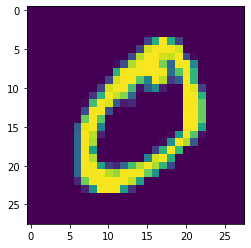

In [9]:
plt.imshow(train_data[1][0][0])

In [10]:
transforms.Resize(size=14)(train_data.data)

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  94,   0,   0],
         ...,
         [  0,   0,  57,  ...,   0,   0,   0],
         [  0,   0,  97,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  10,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]

In [11]:
type(train_data)

torchvision.datasets.mnist.MNIST

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


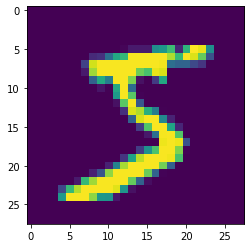

In [12]:
plt.imshow(train_data.train_data[0])

In [13]:
# Resize(size[, interpolation, max_size, …])

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


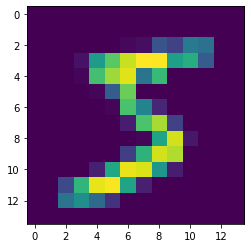

In [14]:
resized = transforms.Resize(size=14)(train_data.train_data)
plt.imshow(resized[0])

In [15]:
type(resized)

torch.Tensor

In [16]:
resized_28 = transforms.Resize(size=28)(train_data.train_data)
resized_14 = transforms.Resize(size=14)(train_data.train_data)
resized_7 = transforms.Resize(size=7)(train_data.train_data)
resized_4 = transforms.Resize(size=4)(train_data.train_data)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


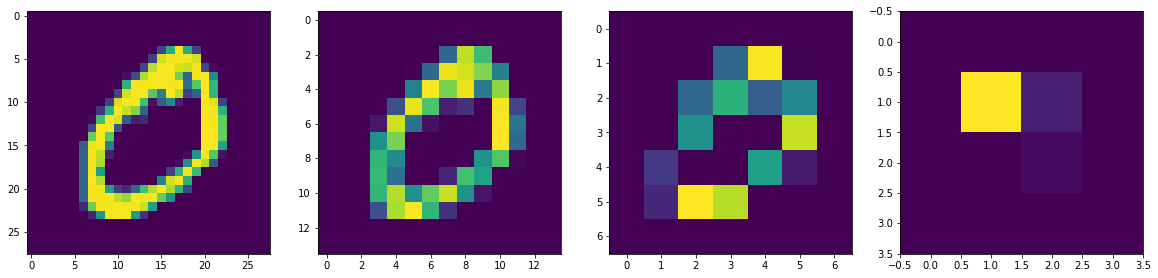

In [17]:
index = 1
f, axarr = plt.subplots(1,4, figsize=(20,5))
axarr[0].imshow(resized_28[index])
axarr[1].imshow(resized_14[index])
axarr[2].imshow(resized_7[index])
axarr[3].imshow(resized_4[index])

<h1>Using Pytorch's Data loaders to feed data into CNN</h1>

In [18]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fda9b431550>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fdabe6ce978>}

<h1>Defining the CNN</h1>

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        '''
        Goes through two layers of 2D convolutions, each followed by a 2x2 max pooling
        
        Dimensions:
        1.) Input Shape:          [batch_size, 1, 28, 28]
        
        2.) After conv:           [batch_size, 16, 24, 24]
            After max pooling:    [batch_size, 32, 12, 12]
        
        3.) After conv:           [batch_size, 16, 12, 12]
            After max pooling:    [batch_size, 32, 4, 4]
            
        4.) After flattening:     [batch_size, 32 * 4 * 4]
        '''
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=0,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 0),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 4 * 4, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 4 * 4)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization
    
    
    def compute_sizes(in_size, ker_size, padding, stride):
        pass

In [20]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=512, out_features=10, bias=True)
)


In [21]:
loss_func = nn.CrossEntropyLoss(); print(loss_func)   
optimizer = torch.optim.Adam(cnn.parameters(), lr= 1e-5); print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1e-05
    weight_decay: 0
)


<h1>Training the CNN</h1>
<div>Error source may be that the dataset resized_28 doesn't have 'labels', just 'images' ---> (for i, (images, labels))</div>

In [22]:
num_epochs = 50
train_acc_data = []
loss_data = []

def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # measure accuracy and record loss
            train_output, last_layer = cnn(images)
            pred_y = torch.max(train_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), accuracy))
                
            if (i+1) % 600 == 0:
                train_acc_data.append(accuracy)
                loss_data.append(loss)
            pass
        
        pass
    
    
    pass
    
train(num_epochs, cnn, loaders)

Epoch [1/50], Step [100/600], Loss: 2.2604, Accuracy: 0.2500
Epoch [1/50], Step [200/600], Loss: 2.2504, Accuracy: 0.2500
Epoch [1/50], Step [300/600], Loss: 2.2196, Accuracy: 0.4100
Epoch [1/50], Step [400/600], Loss: 2.1870, Accuracy: 0.5100
Epoch [1/50], Step [500/600], Loss: 2.1532, Accuracy: 0.6000
Epoch [1/50], Step [600/600], Loss: 2.0820, Accuracy: 0.6200
Epoch [2/50], Step [100/600], Loss: 2.0274, Accuracy: 0.6200
Epoch [2/50], Step [200/600], Loss: 1.9648, Accuracy: 0.6600
Epoch [2/50], Step [300/600], Loss: 1.9235, Accuracy: 0.6500
Epoch [2/50], Step [400/600], Loss: 1.7633, Accuracy: 0.7000
Epoch [2/50], Step [500/600], Loss: 1.7267, Accuracy: 0.6700
Epoch [2/50], Step [600/600], Loss: 1.5866, Accuracy: 0.7000
Epoch [3/50], Step [100/600], Loss: 1.5779, Accuracy: 0.6700
Epoch [3/50], Step [200/600], Loss: 1.4552, Accuracy: 0.7400
Epoch [3/50], Step [300/600], Loss: 1.3591, Accuracy: 0.7500
Epoch [3/50], Step [400/600], Loss: 1.2473, Accuracy: 0.7700
Epoch [3/50], Step [500/

Epoch [23/50], Step [300/600], Loss: 0.1126, Accuracy: 0.9700
Epoch [23/50], Step [400/600], Loss: 0.1692, Accuracy: 0.9600
Epoch [23/50], Step [500/600], Loss: 0.1593, Accuracy: 0.9500
Epoch [23/50], Step [600/600], Loss: 0.1906, Accuracy: 0.9400
Epoch [24/50], Step [100/600], Loss: 0.2530, Accuracy: 0.9600
Epoch [24/50], Step [200/600], Loss: 0.1758, Accuracy: 0.9300
Epoch [24/50], Step [300/600], Loss: 0.1497, Accuracy: 0.9600
Epoch [24/50], Step [400/600], Loss: 0.2505, Accuracy: 0.9200
Epoch [24/50], Step [500/600], Loss: 0.1434, Accuracy: 0.9600
Epoch [24/50], Step [600/600], Loss: 0.2580, Accuracy: 0.8900
Epoch [25/50], Step [100/600], Loss: 0.1007, Accuracy: 0.9800
Epoch [25/50], Step [200/600], Loss: 0.1294, Accuracy: 0.9500
Epoch [25/50], Step [300/600], Loss: 0.0782, Accuracy: 0.9800
Epoch [25/50], Step [400/600], Loss: 0.1571, Accuracy: 0.9500
Epoch [25/50], Step [500/600], Loss: 0.1533, Accuracy: 0.9500
Epoch [25/50], Step [600/600], Loss: 0.2794, Accuracy: 0.9400
Epoch [2

Epoch [45/50], Step [400/600], Loss: 0.1744, Accuracy: 0.9400
Epoch [45/50], Step [500/600], Loss: 0.0738, Accuracy: 0.9700
Epoch [45/50], Step [600/600], Loss: 0.1878, Accuracy: 0.9500
Epoch [46/50], Step [100/600], Loss: 0.0660, Accuracy: 1.0000
Epoch [46/50], Step [200/600], Loss: 0.1620, Accuracy: 0.9400
Epoch [46/50], Step [300/600], Loss: 0.1146, Accuracy: 0.9600
Epoch [46/50], Step [400/600], Loss: 0.1027, Accuracy: 0.9800
Epoch [46/50], Step [500/600], Loss: 0.0412, Accuracy: 0.9900
Epoch [46/50], Step [600/600], Loss: 0.0867, Accuracy: 0.9600
Epoch [47/50], Step [100/600], Loss: 0.0879, Accuracy: 0.9700
Epoch [47/50], Step [200/600], Loss: 0.1819, Accuracy: 0.9300
Epoch [47/50], Step [300/600], Loss: 0.1953, Accuracy: 0.9500
Epoch [47/50], Step [400/600], Loss: 0.1219, Accuracy: 0.9600
Epoch [47/50], Step [500/600], Loss: 0.1414, Accuracy: 0.9700
Epoch [47/50], Step [600/600], Loss: 0.1141, Accuracy: 0.9700
Epoch [48/50], Step [100/600], Loss: 0.0413, Accuracy: 0.9900
Epoch [4

In [23]:
test_acc_data = []

def test():
    cnn.eval()
        
    # Train the model
    correct = 0
    total = 0
    for images, labels in loaders['test']:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        test_acc_data.append(accuracy)
        print("Accuracy: {:.4f}".format(accuracy))
        
#     print('Test Accuracy: %.2f' % accuracy)
    
test()

Accuracy: 0.9500
Accuracy: 0.9700
Accuracy: 0.9700
Accuracy: 0.9800
Accuracy: 0.9800
Accuracy: 0.9600
Accuracy: 0.9800
Accuracy: 0.9800
Accuracy: 0.9600
Accuracy: 0.9500
Accuracy: 0.9800
Accuracy: 0.9800
Accuracy: 0.9900
Accuracy: 0.9900
Accuracy: 0.9400
Accuracy: 0.9700
Accuracy: 0.9800
Accuracy: 0.9700
Accuracy: 0.9400
Accuracy: 0.9600
Accuracy: 0.9900
Accuracy: 0.9400
Accuracy: 0.9500
Accuracy: 0.9400
Accuracy: 0.9500
Accuracy: 0.9800
Accuracy: 0.9600
Accuracy: 0.9700
Accuracy: 0.9700
Accuracy: 0.9800
Accuracy: 0.9500
Accuracy: 0.9700
Accuracy: 0.9900
Accuracy: 0.9800
Accuracy: 0.9600
Accuracy: 0.9900
Accuracy: 0.9400
Accuracy: 0.9900
Accuracy: 0.9700
Accuracy: 0.9400
Accuracy: 0.9700
Accuracy: 0.9500
Accuracy: 0.9600
Accuracy: 0.9700
Accuracy: 0.9800
Accuracy: 0.9600
Accuracy: 0.9500
Accuracy: 0.9900
Accuracy: 0.9800
Accuracy: 0.9800
Accuracy: 0.9700
Accuracy: 0.9900
Accuracy: 1.0000
Accuracy: 0.9900
Accuracy: 0.9600
Accuracy: 0.9000
Accuracy: 0.9700
Accuracy: 0.9500
Accuracy: 1.00

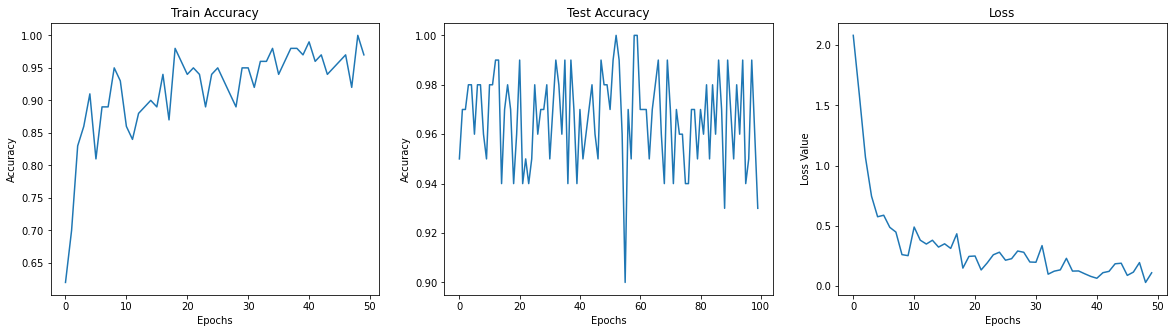

In [24]:
f, axarr = plt.subplots(1,3, figsize=(20, 5))
axarr[0].set_title("Train Accuracy")
axarr[0].set_xlabel("Epochs")
axarr[0].set_ylabel("Accuracy")
axarr[0].plot(train_acc_data)

axarr[1].set_title("Test Accuracy")
axarr[1].set_xlabel("Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].plot(test_acc_data)


axarr[2].set_title("Loss")
axarr[2].set_xlabel("Epochs")
axarr[2].set_ylabel("Loss Value")
axarr[2].plot(loss_data)

In [25]:
cnn.train()
len(loaders['train'])

600

In [26]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [27]:
type(resized_28)

torch.Tensor

In [28]:
for i, image in enumerate(loaders['train']):
    print(i, image.shape)

AttributeError: 'list' object has no attribute 'shape'

<h1>Attempting to resize the dataset when importing with datasets.MNIST</h1>

In [ ]:
# train_data = datasets.MNIST(
#     root = 'data',
#     train = True,                         
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(train_data.data),
#                     transforms.Normalize(0, 1)
#                 ]), 
#     download = True,            
# )
# test_data = datasets.MNIST(
#     root = 'data', 
#     train = False, 
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(test_data.data),
#                     transforms.Normalize(0, 1)
#                 ]) 
# )

In [ ]:
train_data.data.shape